# 22 - Recurren Neural Netwoks and LSTM

by [Alejandro Correa Bahnsen](albahnsen.com/) and [Jesus Solano](https://github.com/jesugome)

version 1.4, May 2019

## Part of the class [Practical Machine Learning](https://github.com/albahnsen/PracticalMachineLearningClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). 

## Recurrent Neuural Network (RNN)

Being human, when we watch a movie, we don’t think from scratch every time while understanding any event. We rely on the recent experiences happening in the movie and learn from them. But, a conventional neural network is unable to learn from the previous events because the information does not pass from one step to the next. On contrary, RNN learns information from immediate previous step.

For example, there is a scene in a movie where a person is in a basketball court. We will improvise the basketball activities in the future frames: an image of someone running and jumping probably be labeled as playing basketball, and an image of someone sitting and watching is probably a spectator watching the game.



<img src="https://raw.githubusercontent.com/albahnsen/AppliedDeepLearningClass/master/notebooks/images/RNN-rolled.png" width="20%" height="20%">

A typical RNN (Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

<img src="https://raw.githubusercontent.com/albahnsen/AppliedDeepLearningClass/master/notebooks/images/RNN-unrolled.png" >


A typical RNN looks like above-where X(t) is input, h(t) is output and A is the neural network which gains information from the previous step in a loop. The output of one unit goes into the next one and the information is passed.

But, sometimes we don’t need our network to learn only from immediate past information. Suppose we want to predict the blank word in the text ‘ David, a 36-year old man lives in San Francisco. He has a female friend Maria. Maria works as a cook in a famous restaurant in New York whom he met recently in a school alumni meet. Maria told him that she always had a passion for _________ . Here, we want our network to learn from dependency ‘cook’ to predict ‘cooking. There is a gap between the information what we want to predict and from where we want it to get predicted . This is called long-term dependency. We can say that anything larger than trigram as a long term dependency. Unfortunately, RNN does not work practically in this situation.

### Why RNN does not work practically
During the training of RNN, as the information goes in loop again and again which results in very large updates to neural network model weights. This is due to the accumulation of error gradients during an update and hence, results in an unstable network. At an extreme, the values of weights can become so large as to overflow and result in NaN values.The explosion occurs through exponential growth by repeatedly multiplying gradients through the network layers that have values larger than 1 or vanishing occurs if the values are less than 1.

# Long Short Term Memory Networks (LSTM)

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by [Hochreiter & Schmidhuber (1997)](http://www.bioinf.jku.at/publications/older/2604.pdf), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

<img src="https://raw.githubusercontent.com/albahnsen/AppliedDeepLearningClass/master/notebooks/images/LSTM3-SimpleRNN.png" width="100%" height="100%">

The repeating module in a standard RNN contains a single layer.
 (Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

<img src="https://raw.githubusercontent.com/albahnsen/AppliedDeepLearningClass/master/notebooks/images/LSTM3-chain.png" width="100%" height="100%">

The repeating module in an LSTM contains four interacting layers.
 (Source: http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

### Detailed process

<img src="https://raw.githubusercontent.com/albahnsen/AppliedDeepLearningClass/master/notebooks/images/1_Niu_c_FhGtLuHjrStkB_4Q.png" width="60%" height="60%">

The repeating module in an LSTM contains four interacting layers.
 (Source: https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47)

The symbols used here have following meaning:

- $x$ : Scaling of information

- $+$ : Adding information

- $\sigma$ : Sigmoid layer

- $tanh$: tanh layer

- $h_{t-1}$ : Output of last LSTM unit

- $c_{t-1}$ : Memory from last LSTM unit

- $X_t$ : Current input

- $c_t$ : New updated memory

- $h_t$ : Current output

Information passes through many such LSTM units.There are three main components of an LSTM unit which are labeled in the diagram:

1) LSTM has a special architecture which enables it to forget the unnecessary information .The sigmoid layer takes the input $X_t$ and $h_{t-1}$ and decides which parts from old output should be removed (by outputting a 0). In our example, when the input is ‘He has a female friend Maria’, the gender of ‘David’ can be forgotten because the subject has changed to ‘Maria’. This gate is called forget gate $f(t)$. The output of this gate is $f(t) \cdot c_{t-1}$.

2) The next step is to decide and store information from the new input $X_t$ in the cell state. A Sigmoid layer decides which of the new information should be updated or ignored. A tanh layer creates a vector of all the possible values from the new input. These two are multiplied to update the new cell sate. This new memory is then added to old memory $c_{t-1}$ to give $c_{t}$. In our example, for the new input ‘ He has a female friend Maria’, the gender of Maria will be updated. When the input is ‘Maria works as a cook in a famous restaurant in New York whom he met recently in a school alumni meet’, the words like ‘famous’, ‘school alumni meet’ can be ignored and words like ‘cook, ‘restaurant’ and ‘New York’ will be updated.

3) Finally, we need to decide what we’re going to output. A sigmoid layer decides which parts of the cell state we are going to output. Then, we put the cell state through a tanh generating all the possible values and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to. In our example, we want to predict the blank word, our model knows that it is a noun related to ‘cook’ from its memory, it can easily answer it as ‘cooking’. Our model does not learn this answer from the immediate dependency, rather it learnt it from long term dependency.

We just saw that there is a big difference in the architecture of a typical RNN and a LSTM. In LSTM, our model learns what information to store in long term memory and what to get rid of.



# Example phishing URL detection

Based on the paper:
- A. Correa Bahnsen, E. C. Bohorquez, S. Villegas, J. Vargas, and F. A. Gonzalez, “Classifying phishing urls using recurrent neural networks,” in Electronic Crime Research (eCrime), 2017 APWG Symposium on. IEEE, 2017, pp. 1–8.
https://albahnsen.com/wp-content/uploads/2018/05/classifying-phishing-urls-using-recurrent-neural-networks_cameraready.pdf

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/phishing.csv')

In [3]:
data.head()

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1


In [4]:
data.tail()

,url,phishing
39995,http://www.diaperswappers.com/forum/member.php...,0
39996,http://posting.bohemian.com/northbay/Tools/Ema...,0
39997,http://www.tripadvisor.jp/Hotel_Review-g303832...,0
39998,http://www.baylor.edu/content/services/downloa...,0
39999,http://www.phinfever.com/forums/viewtopic.php?...,0


#### Model using RF

In [5]:
keywords = ['https', 'login', '.php', '.html', '@', 'sign']
for keyword in keywords:
    data['keyword_' + keyword] = data.url.str.contains(keyword).astype(int)
data['lenght'] = data.url.str.len() - 2
domain = data.url.str.split('/', expand=True).iloc[:, 2]
data['lenght_domain'] = domain.str.len()
data['isIP'] = (domain.str.replace('.', '') * 1).str.isnumeric().astype(int)
data['count_com'] = data.url.str.count('com')

X = data.drop(['url', 'phishing'], axis=1)
y = data.phishing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_jobs=-1, n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print((y_pred == y_test).mean())

0.7990151515151516


## Using LSTM

In the previous experiement, we designed a set of features
extracted from a URL and fed them into a classification model
to predict whether a URL is a case of phishing. We now
approach the problem in a different way. Instead of manually
extracting the features, we directly learn a representation from
the URL’s character sequence.

Each character sequence exhibits correlations, that is,
nearby characters in a URL are likely to be related to each
other. These sequential patterns are important because they can
be exploited to improve the performance of the predictors.

In [5]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

/home/al/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[]


Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
!pip install livelossplot

In [7]:
from livelossplot import PlotLossesKeras
%matplotlib inline

#### Create vocabulary

In [8]:
X = data['url'].tolist()

In [9]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

#### Create embeeding

In [10]:
# Max len
max_url_len = 150
X = [x[:max_url_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [11]:
len(X)

40000

In [12]:
X_pad = sequence.pad_sequences(X, maxlen=max_url_len)

In [13]:
X_pad

array([[ 0,  0,  0, ..., 92, 33, 47],
       [ 0,  0,  0, ..., 76, 38, 47],
       [ 0,  0,  0, ..., 70, 33, 47],
       ...,
       [ 0,  0,  0, ..., 38, 69, 47],
       [ 0,  0,  0, ..., 70, 23, 47],
       [ 0,  0,  0, ..., 96, 70, 47]], dtype=int32)

#### Create the network

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [15]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 128)          12800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 33,441
Trainable params: 33,441
Non-trainable params: 0
_________________________________________________________________


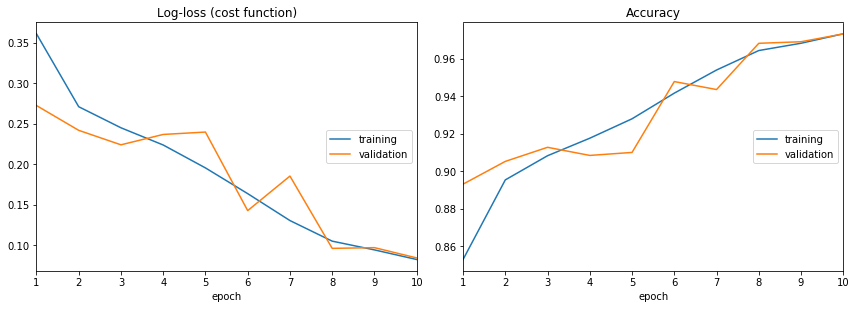

In [17]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [18]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.9731060606060606
